In [1]:
import io
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [12]:
NODEFENSE_OUT_PATH = 'main_nodefense.out'
DEFENSE_OUT_PATH = 'main_defense.out'
COL_NAMES = ['attack_name', 'defense', 'sigma', 'dataset_name', 'test_size', 'accuracy', 'auroc', 'train_auroc', 'auprc', 'f1']

In [24]:
with open(DEFENSE_OUT_PATH, 'r') as f:
    lines = f.readlines()
    data = [s for s in lines if s.startswith('glo_mia')]
    data_str = '\n'.join(data)
with open(NODEFENSE_OUT_PATH, 'r') as f:
    lines = f.readlines()
    data = [s for s in lines if s.startswith('glo_mia')]
    data_str += '\n'.join(data)


In [25]:
res = pd.read_csv(io.StringIO(data_str), names=COL_NAMES)

In [26]:
res

,attack_name,defense,sigma,dataset_name,test_size,accuracy,auroc,train_auroc,auprc,f1
0,glo_mia,logits,0.5,proteins,0.25,0.681655,0.662474,0.904899,0.835063,0.776233
1,glo_mia,logits,0.5,proteins,0.25,0.787770,0.766144,0.881997,0.899999,0.858513
2,glo_mia,logits,0.5,proteins,0.25,0.757194,0.779014,0.958959,0.899601,0.835165
3,glo_mia,logits,0.5,proteins,0.25,0.733813,0.708486,0.953614,0.876748,0.819951
4,glo_mia,logits,0.5,proteins,0.25,0.739209,0.667305,0.901473,0.821499,0.830805
5,glo_mia,logits,1.0,proteins,0.25,0.742806,0.687024,0.983967,0.836280,0.833139
6,glo_mia,logits,1.0,proteins,0.25,0.753597,0.692062,0.963566,0.837319,0.839766
7,glo_mia,none,NaN,mutag,0.25,0.670213,0.571429,0.883929,0.783092,0.780142
8,glo_mia,none,NaN,mutag,0.25,0.255319,0.442857,0.947619,0.713283,0.000000
9,glo_mia,none,NaN,mutag,0.25,0.659574,0.635119,0.871429,0.811726,0.746032


In [27]:
# res = pd.read_csv('results.csv')
# res['sigma'] = [None, None, None, None, 0.1, 1., 0.5, None, 1.]
# res

In [28]:
# res_mean = res.groupby(['dataset_name', 'defense'])[['auroc', 'auprc', 'f1']].mean()
# res_mean

In [29]:
# group_means = res.groupby('defense')['auprc'].mean()
grouped_stats = res.groupby('dataset_name')['auroc'].agg(['mean', 'std']).reset_index()

Text(0.5, 1.0, 'GLO-MIA variation attack on GAT')

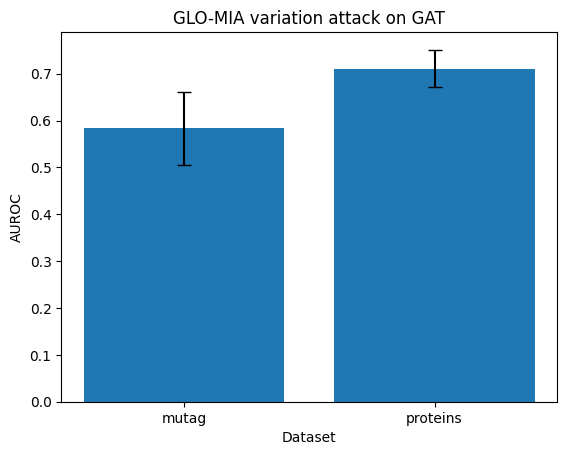

In [30]:
# group_means.plot(kind='bar')
plt.bar(grouped_stats['dataset_name'], grouped_stats['mean'],
            yerr=grouped_stats['std'],  # or 'sem' if using standard error
            capsize=5)
plt.xlabel('Dataset')
plt.ylabel('AUROC')
plt.title('GLO-MIA variation attack on GAT ')

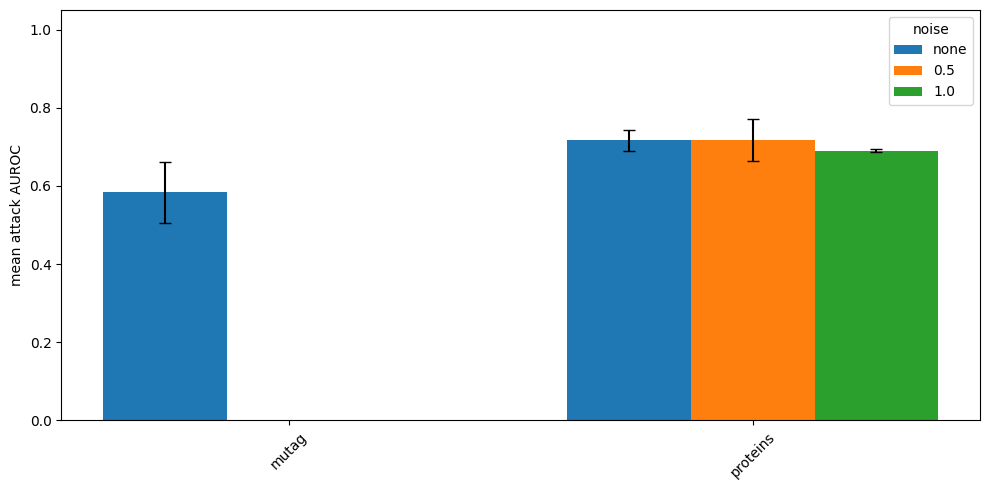

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = res.copy()

# df = df[df['dataset_name'] == 'proteins']

# Convert sigma NaN to a label so it appears as a bar
df["sigma"] = df["sigma"].fillna("none").astype(str)

# Aggregate mean and std of AUROC
agg = (
    df.groupby(["dataset_name", "sigma"])["auroc"]
      .agg(["mean", "std"])
      .reset_index()
)

# Pivot for easier plotting
sigma_order = sorted(df["sigma"].unique(), key=lambda s: (s != "none", s))
mean_pivot = agg.pivot(index="dataset_name", columns="sigma", values="mean").reindex(columns=sigma_order)
std_pivot  = agg.pivot(index="dataset_name", columns="sigma", values="std").reindex(columns=sigma_order)

datasets = mean_pivot.index.tolist()
sigmas = sigma_order
n_datasets = len(datasets)
n_sigmas = len(sigmas)

x = np.arange(n_datasets)
total_width = 0.8
width = total_width / n_sigmas
offset_start = - (total_width - width) / 2

plt.figure(figsize=(10, 5))

for i, sigma in enumerate(sigmas):
    xpos = x + offset_start + i * width
    plt.bar(
        xpos,
        mean_pivot[sigma].values,
        width=width,
        yerr=std_pivot[sigma].values,
        capsize=4,
        label=str(sigma)
    )

plt.xticks(x, datasets, rotation=45, ha="center")
plt.ylabel("mean attack AUROC")
# plt.title("Grouped AUROC by Dataset and Sigma")
plt.ylim(0, 1.05)
plt.legend(title="noise")

plt.tight_layout()
plt.show()
